In [ ]:
!pip install hmmlearn
!!pip install ace
!pip install hmmlearn scikit-learn
!pip install tensorflow

In [ ]:
import pandas as pd
import ace as tools

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MLNBD/ML_Neuro/DATA ANALYTICS/processed_phase_data.csv")

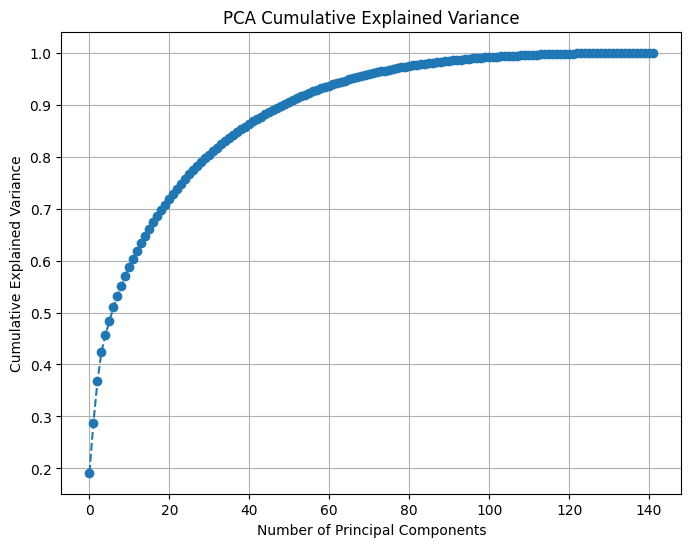

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ast

# Convert the spike_counts column from string to numeric array
data['spike_counts'] = data['spike_counts'].apply(ast.literal_eval)
spike_counts = np.array(data['spike_counts'].tolist())

# Perform PCA on the spike counts
pca = PCA()
pca.fit(spike_counts)

# Calculate the cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# Perform PCA to retain only the first 30 components
pca_30 = PCA(n_components=30)
principal_components = pca_30.fit_transform(spike_counts)

# Create a DataFrame for the first 30 principal components
pc_columns = [f"PC{i+1}" for i in range(30)]
pca_df = pd.DataFrame(principal_components, columns=pc_columns)

# Append the principal components to the original dataset
data_with_pca = pd.concat([data.reset_index(drop=True), pca_df], axis=1)

# Save the new dataset to a CSV file
# new_dataset_path = '/mnt/data/data_with_30_pcs.csv'
# data_with_pca.to_csv(new_dataset_path, index=False)

data_with_pca_dropped = data_with_pca.drop(columns=["pca_1", "pca_2"])


In [ ]:
data_with_pca_dropped

,trial_id,phase,region,mean_activity,max_activity,activity_variance,start_time,end_time,spike_counts,label,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0,planning,PMd,3.676056,20,19.247173,0.000,1.413,"[0, 0, 0, 0, 3, 0, 3, 0, 0, 8, 16, 0, 3, 13, 1...",0,...,-2.143316,0.868257,7.784956,0.635400,3.365418,1.358458,-8.039986,4.015062,3.489712,2.365981
1,1,planning,PMd,2.260563,15,9.122248,3.500,4.324,"[0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 9, 0, 1, 15, 6,...",0,...,6.389097,-3.426366,0.464805,-3.039483,-2.737245,-1.337217,-2.553211,1.814988,4.199871,6.602489
2,2,planning,PMd,2.598592,16,8.578308,5.700,6.540,"[0, 0, 3, 2, 0, 1, 0, 2, 2, 1, 7, 0, 2, 11, 13...",0,...,-1.888131,-4.331656,1.899006,-1.144936,-2.175628,-1.667379,-0.235551,4.666199,-1.555942,0.449086
3,3,planning,PMd,4.978873,27,30.626314,8.600,10.259,"[14, 5, 11, 1, 1, 3, 2, 1, 5, 4, 22, 0, 7, 14,...",0,...,9.299722,-0.990014,5.966823,-4.513327,9.771699,-3.682982,2.325706,-7.704166,1.743686,5.435391
4,4,planning,PMd,4.838028,28,34.107568,11.800,13.225,"[1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 21, 0, 6, 19, 1...",0,...,5.909762,3.520418,1.753781,-3.085715,-11.015955,-4.239764,-5.993062,-1.498710,1.082145,-2.199387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,95,execution,M1,5.211268,42,36.096211,280.500,282.021,"[2, 7, 5, 0, 0, 0, 3, 0, 2, 0, 21, 0, 2, 2, 6,...",1,...,1.003373,-1.703227,-4.631432,5.635127,4.308330,-2.478079,-2.449140,-2.175961,-0.943276,-3.670684
196,96,execution,M1,4.169014,24,19.591153,283.161,284.466,"[2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 9, 6, 11, 3, 0,...",1,...,-0.914788,-1.458677,11.005291,-0.892438,5.332950,2.868496,-1.686184,2.391472,-0.042730,5.169122
197,97,execution,M1,5.183099,27,27.332672,285.892,287.376,"[1, 0, 6, 6, 6, 2, 0, 0, 0, 0, 23, 2, 7, 6, 10...",1,...,-1.492734,-2.575396,7.765666,-3.854157,-3.602573,-0.223333,-0.841984,-2.305198,5.636088,-3.874806
198,98,execution,M1,5.619718,37,36.799048,289.238,290.736,"[0, 1, 5, 5, 4, 2, 2, 0, 0, 2, 37, 0, 17, 4, 1...",1,...,0.023515,7.588849,9.497145,0.769600,-4.215032,-0.015505,-5.825036,12.070450,-0.549549,1.381331


In [ ]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the data
data = data_with_pca_dropped  # Update this to your file path if needed

# Prepare the features and labels
X = data[[f"PC{i+1}" for i in range(30)]].values  # Use all 30 principal components
phases = data["phase"].values                    # Labels

# Encode the phases into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(phases)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the HMM model
n_states = len(np.unique(y))  # Number of states = unique phases
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100, random_state=42)

# Fit the HMM model to the training data
model.fit(X_train)

# Predict states on the validation set
decoded_states = model.predict(X_val)

# Convert decoded states back to phase labels
decoded_phases = label_encoder.inverse_transform(decoded_states)
true_phases = label_encoder.inverse_transform(y_val)

# Evaluate the model
accuracy = accuracy_score(true_phases, decoded_phases)
print("Classification Report:")
print(classification_report(true_phases, decoded_phases))
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

   execution       0.46      0.95      0.62        19
    planning       0.00      0.00      0.00        21

    accuracy                           0.45        40
   macro avg       0.23      0.47      0.31        40
weighted avg       0.22      0.45      0.29        40

Accuracy: 0.45


In [ ]:
from hmmlearn import hmm
from sklearn.cluster import KMeans
import numpy as np

# Initialize the model with more hidden states and full covariance
n_states = 5  # Try with more states
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=200, random_state=42)

# Use KMeans to initialize the state means
kmeans = KMeans(n_clusters=n_states, random_state=42).fit(X_train)
model.means_ = kmeans.cluster_centers_

# Fit the model to the training data
model.fit(X_train)

# Predict on validation data
decoded_states = model.predict(X_val)

# Evaluate the model
decoded_phases = label_encoder.inverse_transform(decoded_states)
true_phases = label_encoder.inverse_transform(y_val)

# Print accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report
print("Classification Report:")
print(classification_report(true_phases, decoded_phases))
accuracy = accuracy_score(true_phases, decoded_phases)
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

   execution       0.33      0.05      0.09        19
    planning       0.51      0.90      0.66        21

    accuracy                           0.50        40
   macro avg       0.42      0.48      0.37        40
weighted avg       0.43      0.50      0.39        40

Accuracy: 0.50


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")


Random Forest Model Accuracy: 0.95


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load and preprocess the initial spike data
data = pd.read_csv("/content/drive/MyDrive/MLNBD/ML_Neuro/DATA ANALYTICS/processed_phase_data.csv")  # Update to your file path
spike_data = np.array(data["spike_counts"].apply(eval).tolist())  # Convert spike_counts from string to array

# Standardize the raw spike data
scaler = StandardScaler()
spike_data_scaled = scaler.fit_transform(spike_data)

# Convert data to PyTorch tensors
spike_data_tensor = torch.tensor(spike_data_scaled, dtype=torch.float32)
dataset = TensorDataset(spike_data_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define VAE architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.encoder_fc1 = nn.Linear(input_dim, 128)
        self.encoder_fc2 = nn.Linear(128, 64)
        self.z_mean = nn.Linear(64, latent_dim)
        self.z_log_var = nn.Linear(64, latent_dim)

        # Decoder
        self.decoder_fc1 = nn.Linear(latent_dim, 64)
        self.decoder_fc2 = nn.Linear(64, 128)
        self.decoder_fc3 = nn.Linear(128, input_dim)

    def encode(self, x):
        x = torch.relu(self.encoder_fc1(x))
        x = torch.relu(self.encoder_fc2(x))
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        return z_mean, z_log_var

    def reparameterize(self, z_mean, z_log_var):
        epsilon = torch.randn_like(z_mean)
        return z_mean + epsilon * torch.exp(0.5 * z_log_var)

    def decode(self, z):
        z = torch.relu(self.decoder_fc1(z))
        z = torch.relu(self.decoder_fc2(z))
        return torch.sigmoid(self.decoder_fc3(z))

    def forward(self, x):
        z_mean, z_log_var = self.encode(x)
        z = self.reparameterize(z_mean, z_log_var)
        x_reconstructed = self.decode(z)
        return x_reconstructed, z_mean, z_log_var

# Define dimensions
input_dim = spike_data_scaled.shape[1]
latent_dim = 10
vae = VAE(input_dim, latent_dim)

# Loss function
def vae_loss(x, x_reconstructed, z_mean, z_log_var):
    reconstruction_loss = nn.MSELoss()(x_reconstructed, x)
    kl_divergence = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())
    return reconstruction_loss + kl_divergence / x.size(0)

# Optimizer
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training loop
num_epochs = 50
vae.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        x_batch = batch[0]
        optimizer.zero_grad()
        x_reconstructed, z_mean, z_log_var = vae(x_batch)
        loss = vae_loss(x_batch, x_reconstructed, z_mean, z_log_var)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

# Encode the data into the latent space
vae.eval()
with torch.no_grad():
    z_mean, _ = vae.encode(spike_data_tensor)
    latent_data = z_mean.numpy()

# Save the latent space data
latent_df = pd.DataFrame(latent_data, columns=[f"latent_dim_{i+1}" for i in range(latent_dim)])
latent_df = pd.concat([data.reset_index(drop=True), latent_df], axis=1)
latent_df.to_csv("vae_latent_space_with_raw_spike_data_pytorch.csv", index=False)

print("Latent space data saved to 'vae_latent_space_with_raw_spike_data_pytorch.csv'")


Epoch 1/50, Loss: 8.9948
Epoch 2/50, Loss: 8.4792
Epoch 3/50, Loss: 8.2068
Epoch 4/50, Loss: 7.7520
Epoch 5/50, Loss: 7.3648
Epoch 6/50, Loss: 7.0945
Epoch 7/50, Loss: 7.1814
Epoch 8/50, Loss: 7.1233
Epoch 9/50, Loss: 7.0415
Epoch 10/50, Loss: 7.1642
Epoch 11/50, Loss: 7.1224
Epoch 12/50, Loss: 7.0417
Epoch 13/50, Loss: 7.1118
Epoch 14/50, Loss: 7.2076
Epoch 15/50, Loss: 6.9014
Epoch 16/50, Loss: 7.0927
Epoch 17/50, Loss: 7.0077
Epoch 18/50, Loss: 6.9249
Epoch 19/50, Loss: 6.9339
Epoch 20/50, Loss: 6.9502
Epoch 21/50, Loss: 6.9043
Epoch 22/50, Loss: 6.7860
Epoch 23/50, Loss: 6.8995
Epoch 24/50, Loss: 7.0141
Epoch 25/50, Loss: 6.9437
Epoch 26/50, Loss: 7.1024
Epoch 27/50, Loss: 7.1544
Epoch 28/50, Loss: 6.9526
Epoch 29/50, Loss: 6.9559
Epoch 30/50, Loss: 6.8876
Epoch 31/50, Loss: 6.8671
Epoch 32/50, Loss: 6.9107
Epoch 33/50, Loss: 7.0027
Epoch 34/50, Loss: 7.2639
Epoch 35/50, Loss: 7.0166
Epoch 36/50, Loss: 6.9190
Epoch 37/50, Loss: 6.9451
Epoch 38/50, Loss: 7.2369
Epoch 39/50, Loss: 6.

In [ ]:
latent_df.columns

Index(['trial_id', 'phase', 'region', 'mean_activity', 'max_activity',
       'activity_variance', 'start_time', 'end_time', 'spike_counts', 'label',
       'pca_1', 'pca_2', 'latent_dim_1', 'latent_dim_2', 'latent_dim_3',
       'latent_dim_4', 'latent_dim_5', 'latent_dim_6', 'latent_dim_7',
       'latent_dim_8', 'latent_dim_9', 'latent_dim_10'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the latent space data
latent_data = pd.read_csv("vae_latent_space_with_raw_spike_data_pytorch.csv")  # Update with your file path

# Prepare the features (latent dimensions) and labels
X = latent_data[[f"latent_dim_{i+1}" for i in range(10)]].values  # Use the 10 latent dimensions
phases = latent_data["phase"].values  # Phase labels

# Encode the phases into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(phases)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the HMM model
n_states = len(np.unique(y))  # Number of states = number of unique phases
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100, random_state=42)

# Fit the HMM model to the training data
model.fit(X_train)

# Predict states on the validation set
decoded_states = model.predict(X_val)

# Convert decoded states back to phase labels
decoded_phases = label_encoder.inverse_transform(decoded_states)
true_phases = label_encoder.inverse_transform(y_val)

# Evaluate the model
accuracy = accuracy_score(true_phases, decoded_phases)
print("Classification Report:")
print(classification_report(true_phases, decoded_phases))
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

   execution       0.47      1.00      0.64        19
    planning       0.00      0.00      0.00        21

    accuracy                           0.47        40
   macro avg       0.24      0.50      0.32        40
weighted avg       0.23      0.47      0.31        40

Accuracy: 0.47


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


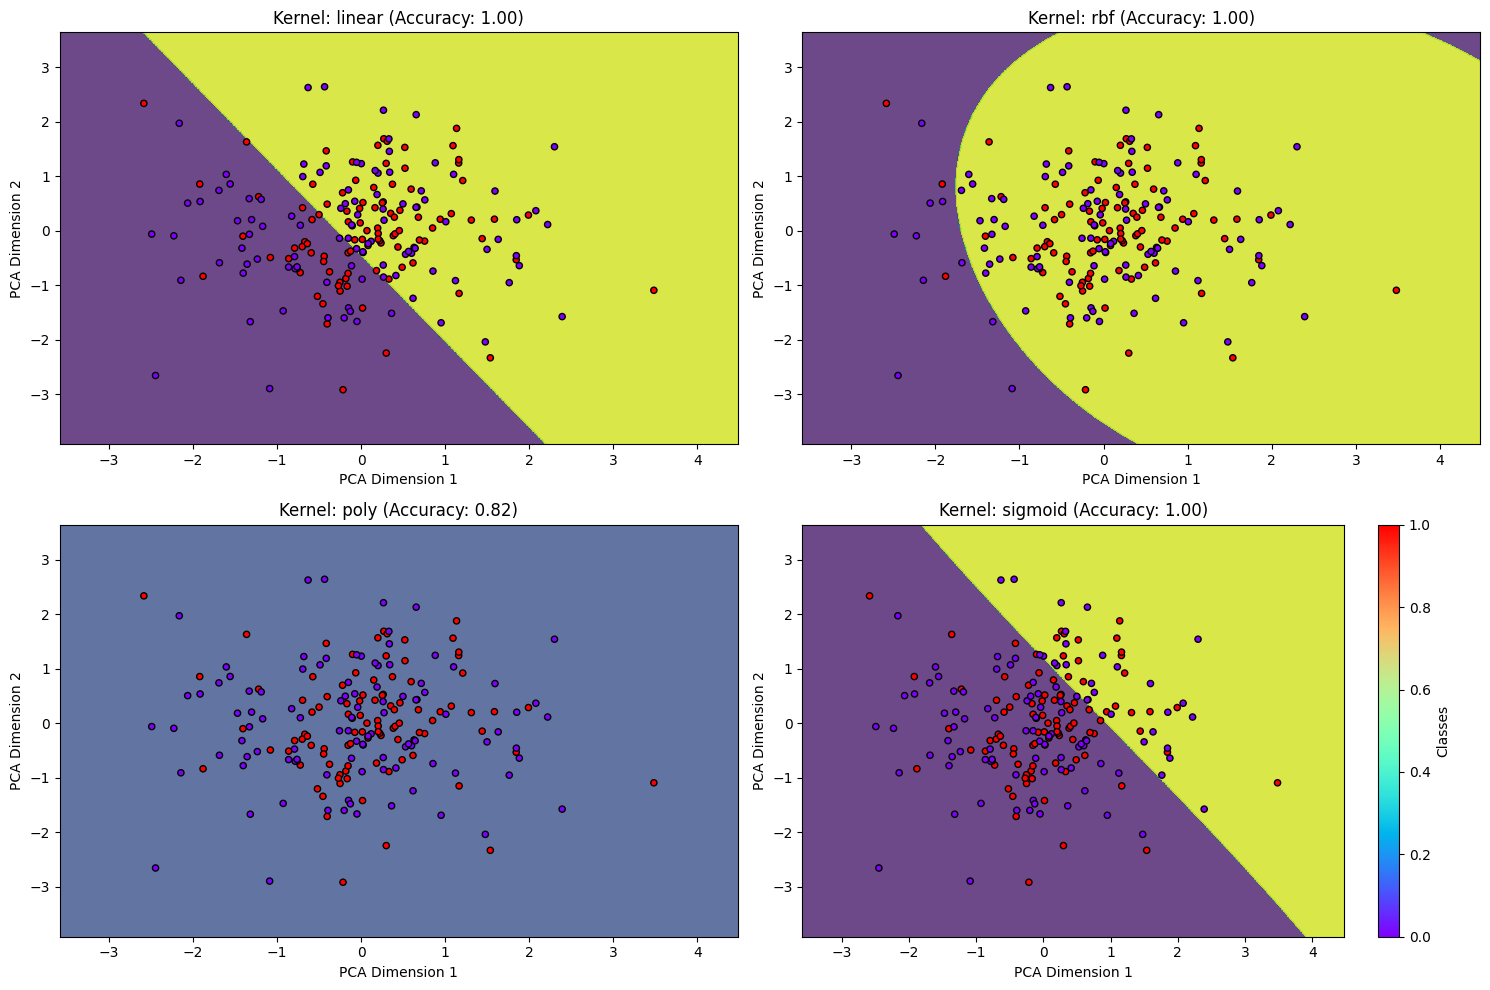

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load the data with 30 principal components
data = data_with_pca_dropped  # Update to your file path

# Prepare features and labels
X = data[[f"PC{i+1}" for i in range(30)]].values  # Use all 30 PCs as features
phases = data["phase"].values  # Phase labels

# Encode labels numerically
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(phases)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce features to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_2d, X_val_2d = train_test_split(X_pca_2d, test_size=0.2, random_state=42)[0:2]

# Define kernels to test
kernels = ["linear", "rbf", "poly", "sigmoid"]
kernel_results = {}

# Visualization setup
plt.figure(figsize=(15, 10))
for i, kernel in enumerate(kernels):
    # Train SVM with the current kernel
    svm_model = SVC(kernel=kernel, C=1.0, gamma="scale", random_state=42)
    svm_model.fit(X_train, y_train)

    # Evaluate on validation set
    y_pred = svm_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    kernel_results[kernel] = accuracy

    # Visualize decision boundary using 2D PCA-reduced data
    plt.subplot(2, 2, i + 1)
    x_min, x_max = X_pca_2d[:, 0].min() - 1, X_pca_2d[:, 0].max() + 1
    y_min, y_max = X_pca_2d[:, 1].min() - 1, X_pca_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, edgecolor="k", s=20, cmap=plt.cm.rainbow)
    plt.title(f"Kernel: {kernel} (Accuracy: {accuracy:.2f})")
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")

# Add legend and show results
plt.tight_layout()
plt.colorbar(scatter, ax=plt.gca(), label="Classes")
plt.show()

# Print best kernel results
best_kernel = max(kernel_results, key=kernel_results.get)
print("\nBest Kernel:", best_kernel)
print("Best Accuracy:", kernel_results[best_kernel])


Better hmm with vae results and kmean initialisation for covariance

In [ ]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the VAE latent dimensions and phase data
vae_data = pd.read_csv("vae_latent_space_with_raw_spike_data_pytorch.csv")  # Update the file path

# Prepare features (VAE latent dimensions) and labels (phases)
X = vae_data[[f"latent_dim_{i+1}" for i in range(10)]].values  # Adjust to the number of latent dimensions
phases = vae_data["phase"].values  # Phase labels

# Encode the phases into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(phases)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the HMM model
n_states = len(np.unique(y))  # Number of unique phases
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=200, random_state=42)

# Fit the HMM model to the training data
model.fit(X_train)

# Predict states on the validation set
decoded_states = model.predict(X_val)

# Convert decoded states back to phase labels
decoded_phases = label_encoder.inverse_transform(decoded_states)
true_phases = label_encoder.inverse_transform(y_val)

# Evaluate the model
accuracy = accuracy_score(true_phases, decoded_phases)
print("Classification Report:")
print(classification_report(true_phases, decoded_phases))
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

   execution       0.53      0.89      0.67        19
    planning       0.75      0.29      0.41        21

    accuracy                           0.57        40
   macro avg       0.64      0.59      0.54        40
weighted avg       0.65      0.57      0.53        40

Accuracy: 0.57
